In [2]:
import csv
import pandas as p
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls


from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize


In [3]:
#read input data
data = p.read_csv('/Users/GS/Desktop/DATA/dialogs_1.csv', header=0)

/Users/GS/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.



In [4]:
#replace nan and get len of content
data['Контент'] = data['Контент'].fillna(" ")
data['len_content'] = data['Контент'].apply(len)

In [5]:
data.head(100)

ID Дата.изменения.статуса                  Статус         Автор  \
0   282893.0    2088-04-02 03:01:12                   Новый  token_102441   
1   282893.0    2088-04-02 03:46:55                Инцидент      token_NA   
2   282893.0    2088-04-02 05:52:52  Ожидание ответа автора  token_111418   
3   282893.0    2088-04-02 05:52:53  Ожидание ответа автора      token_NA   
4   282893.0    2088-04-03 05:58:11                Закрытые      token_NA   
5   282894.0    2088-04-02 03:02:50                   Новый   token_89751   
6   282894.0    2088-04-02 03:49:48                Инцидент      token_NA   
7   282894.0    2088-04-02 06:16:07  Ожидание ответа автора  token_111417   
8   282894.0    2088-04-02 06:16:07  Ожидание ответа автора      token_NA   
9   282894.0    2088-04-02 11:22:58                Инцидент      token_NA   
10  282894.0    2088-04-02 11:22:58                Инцидент   token_89751   
11  282894.0    2088-04-02 12:01:20  Ожидание ответа автора  token_111417   
12  282894.0    2088-04-02 12:01:21  Ожидание ответа автора      token_NA   
13  282894.0    2088-04-02 12:02:56                Инцидент      token_NA   
14  282894.0    2088-04-02 12:02:56                Инцидент   token_89751   
15  282894.0    2088-04-02 12:26:18                Закрытые  token_111417   
16  282894.0    2088-04-02 12:26:18                Закрытые      token_NA   
17  282896.0    2088-04-02 03:13:16                   Новый   token_66467   
18  282896.0    2088-04-02 03:13:16                   Новый   token_66467   
19  282896.0    2088-04-02 03:13:18                   Новый   token_66467   
20  282896.0    2088-04-02 03:13:27                   Новый   token_66467   
21  282896.0    2088-04-02 03:50:09                Инцидент      token_NA   
22  282896.0    2088-04-02 06:28:02  Ожидание ответа автора  token_111418   
23  282896.0    2088-04-02 06:28:02  Ожидание ответа автора      token_NA   
24  282896.0    2088-04-03 06:33:13                Закрытые      token_NA   
25  282897.0    2088-04-02 03:02:52                   Новый   token_76426   
26  282897.0    2088-04-02 03:50:19                Инцидент      token_NA   
27  282897.0    2088-04-02 05:56:10  Ожидание ответа автора  token_111417   
28  282897.0    2088-04-02 05:56:10  Ожидание ответа автора      token_NA   
29  282897.0    2088-04-03 05:58:11                Закрытые      token_NA   
..       ...                    ...                     ...           ...   
70  282900.0    2088-04-02 03:48:52                   Новый   token_64648   
71  282900.0    2088-04-02 03:51:52                Инцидент      token_NA   
72  282900.0    2088-04-02 06:29:52  Ожидание ответа автора  token_111419   
73  282900.0    2088-04-02 06:29:53  Ожидание ответа автора      token_NA   
74  282900.0    2088-04-03 06:33:13                Закрытые      token_NA   
75  282901.0    2088-04-02 03:37:50                   Новый   token_96295   
76  282901.0    2088-04-02 03:37:51                   Новый   token_96295   
77  282901.0    2088-04-02 03:52:16                Инцидент      token_NA   
78  282901.0    2088-04-02 05:57:49  Ожидание ответа автора  token_111417   
79  282901.0    2088-04-02 05:57:49  Ожидание ответа автора      token_NA   
80  282901.0    2088-04-03 06:03:13                Закрытые      token_NA   
81  282902.0    2088-04-02 03:27:48                   Новый   token_34143   
82  282902.0    2088-04-02 03:32:48                   Новый   token_34143   
83  282902.0    2088-04-02 03:52:43                Инцидент      token_NA   
84  282902.0    2088-04-02 06:31:34  Ожидание ответа автора  token_111417   
85  282902.0    2088-04-02 06:31:34  Ожидание ответа автора      token_NA   
86  282902.0    2088-04-03 06:33:13                Закрытые      token_NA   
87  282912.0    2088-04-02 04:02:49                   Новый   token_60370   
88  282912.0    2088-04-02 04:10:30                Инцидент      token_NA   
89  282912.0    2088-04-02 06:57:34  Ожидание ответа автора  token_111417   
90  28

In [14]:
#select interesting categorical attributes and plot category frequency ONLY FOR FIRST MESSAGE IN EACH DIALOG
attrib_list = ['Тип.обращения','Хост','Тема','Локация','Тональность','Тип']

for i in attrib_list:
    cnt_srs = data[data['Статус'] =='Новый'][i].value_counts().head(20)
    trace = go.Bar(
        y=cnt_srs.index[::-1],
        x=cnt_srs.values[::-1],
        orientation = 'h',
        marker=dict(
            color=cnt_srs.values[::-1],
            colorscale = 'Blues',
            reversescale = True
        ),
    )

    layout = dict(
        title='Распределение' + i,
        )
    datf = [trace]
    fig = go.Figure(data=datf, layout=layout)
    py.iplot(fig, filename="i")

# Большая часть текстов из ВК (личные сообщения).
Классификатор тем не работает и на наш взгляд предложенные категории не очевидны. 
Представлен преимущественно Московский регион - анализ регионов на таком датасете не имеет смысла. 

# Анализ корреляций переменных

In [7]:

from sklearn.preprocessing import LabelEncoder

data_tf = p.DataFrame()

lb_make = LabelEncoder()
for x in attrib_list:
    data_tf[x] = lb_make.fit_transform(data[data['Статус'] =='Новый'][x])
    
    

In [8]:
data_tf.head(5)

Тип.обращения  Хост  Подписчики  Тема  Локация  Тональность  Тип
0            227   260         260   243    65684            0    0
1            228   260           1   241    46596        49661    0
2            227   260          17   238    65684        49660    0
3            227   260          17   238    65684        49659    0
4            227   260          17   241    65684        49658    0

In [9]:
    data_tf =     data_tf.rename(columns={'Тип.обращения': 'type_of_inc', 'Хост': 'host','Подписчики': 'followers', 
                                          'Тема': 'topic', 'Локация':'location',
                                          'Тональность':'sentiment', 'Тип' :'type' })

In [10]:
data_tf.dtypes

type_of_inc    int64
host           int64
followers      int64
topic          int64
location       int64
sentiment      int64
type           int64
dtype: object

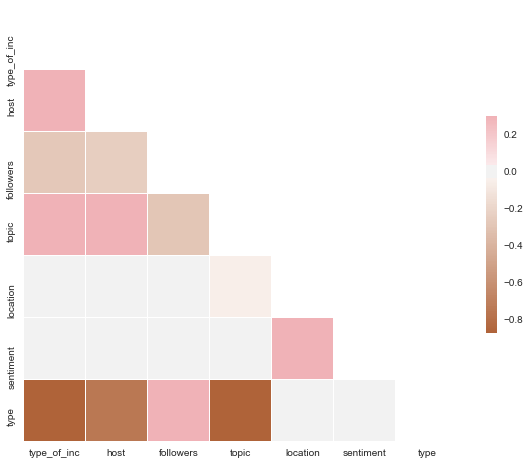

In [11]:
corr = data_tf.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set(style="white")

f, ax = plt.subplots(figsize=(10, 8))
cmap = sns.diverging_palette(30, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.1, cbar_kws={"shrink": .5});

In [12]:
import transliterate
from transliterate import translit, get_available_language_codes

attrib_list_eng = []
for i in data.columns:
    if i == 'ID':
        attrib_list_eng.append('ID')
    elif i == 'len_content':
        attrib_list_eng.append('len_content')
    else:
        attrib_list_eng.append(translit(i.decode('utf-8'), reversed=True))

print attrib_list_eng



['ID', u'Data.izmenenija.statusa', u'Status', u'Avtor', u"Pol'zovatel'", u'Kategorija.avtora', u'Kontent', u'Tip.obraschenija', u'Host', u'Podpischiki', u'Tema', u'Lokatsija', u"Tonal'nost'", u'Tip', 'len_content']


In [13]:
data.columns = attrib_list_eng

In [67]:
data[data['Kontent'] == '\'Сообщение без текста'].size

180960

In [113]:
dfNew = p.DataFrame()
filter = data["Kontent"] != " "
dfNew = data[filter]
dfNew = dfNew[dfNew['Kontent'] != '\'Сообщение без текста']

dfNew = dfNew[dfNew['Kontent'] !='\'xxx xxx xx xx']

dfNew = dfNew[dfNew['len_content'] >30]

In [114]:
dfNew.size

8250945

In [130]:
for i in range(10):
    print dfNew.iloc[int(i)]['Kontent']

'Если я перейду с тарифа мой разговор на мой онлайн когда мне нужно будет оплатить абон. Плату. Подключение у меня 25го числа, хочу перейти щас
'[xxxxx], здравствуйте. При смене тарифного плана абонентская плата спишется в полном объеме (340 руб). Стоимость перехода на тариф: Бесплатно, если с момента последней смены прошло более 30 дней, в остальных случаях - 150 руб.   Следовательно, если вы перейдете 1 числа, то спишется абонентская плата, следующая спишется через месяц (в ту же дату).   Удалось разобраться?
'Добрый вечер! Интересует сотрудничество с вашим брендом - мы занимаемся продвижением артистов в вк, и можем сделать вам рекламную интеграцию product placement на аудиторию более 45 000 000 подписчиков (будет размещено в более 1 500 различных сообществ). Проведем фотосессии вашего смартфона с моделями, фото будут наподобие что прикрепил - с логотипом Tele2 в кадре, к фото будем добавлять подборку песен и делать посев по сообществам вк. Интересно ли вам сотрудничество такого план

In [115]:
dfNew.head(10)

ID Data.izmenenija.statusa                  Status         Avtor  \
0   282893.0     2088-04-02 03:01:12                   Новый  token_102441   
2   282893.0     2088-04-02 05:52:52  Ожидание ответа автора  token_111418   
5   282894.0     2088-04-02 03:02:50                   Новый   token_89751   
7   282894.0     2088-04-02 06:16:07  Ожидание ответа автора  token_111417   
10  282894.0     2088-04-02 11:22:58                Инцидент   token_89751   
11  282894.0     2088-04-02 12:01:20  Ожидание ответа автора  token_111417   
14  282894.0     2088-04-02 12:02:56                Инцидент   token_89751   
15  282894.0     2088-04-02 12:26:18                Закрытые  token_111417   
17  282896.0     2088-04-02 03:13:16                   Новый   token_66467   
18  282896.0     2088-04-02 03:13:16                   Новый   token_66467   

    Pol'zovatel' Kategorija.avtora  \
0   token_111457           Обычный   
2   token_111438               NaN   
5   token_111457           Обычный   
7   token_111456               NaN   
10      token_NA           Обычный   
11  token_111434               NaN   
14      token_NA           Обычный   
15  token_111434               NaN   
17  token_111457           Обычный   
18  token_111457           Обычный   

                                              Kontent  Tip.obraschenija  \
0   'Если я перейду с тарифа мой разговор на мой о...       Комментарий   
2   '[xxxxx], здравствуйте. При смене тарифного пл...               NaN   
5   'Добрый вечер! Интересует сотрудничество с ваш...  Личное сообщение   
7   'Олег, здравствуйте. Сообщите вашу контактную ...               NaN   
10  'Контактное лицо: Степан<br>Почта xxx@mail.ru<...  Личное сообщение   
11  'Олег, передали информацию коллегам. Ожидайте ...               NaN   
14       'Спасибо больше! Нет, вопросов больше нет :)  Личное сообщение   
15  'Олег, хорошо. Если у вас появятся новые вопро...               NaN   
17                           'Теле 2 зажигай давай...       Комментарий   
18  'Интернет по дешевле а денег по больше из за р...       Комментарий   

          Host  Podpischiki               Tema Lokatsija Tonal'nost'      Tip  \
0   'ВКонтакте        260.0             Тарифы    Москва         NaN   0-пост   
2          NaN          NaN                NaN       NaN         NaN  1-ответ   
5   'ВКонтакте          1.0             Прочее       NaN         NaN   0-пост   
7          NaN          NaN                NaN       NaN         NaN  1-ответ   
10  'ВКонтакте          1.0             Прочее       NaN         NaN   0-пост   
11         NaN          NaN                NaN       NaN         NaN  1-ответ   
14  'ВКонтакте          1.0             Прочее       NaN         NaN   0-пост   
15         NaN          NaN                NaN       NaN         NaN  1-ответ   
17  'ВКонтакте         17.0  Официальные блоги    Москва         NaN   0-пост   
18  'ВКонтакте         17.0  Официальные блоги    Москва         NaN   0-пост   

    len_content  
0           256  
2           653  
5           854  
7           277  
10          683  
11          157  
14           77  
15          251  
17           40  
18          116

In [159]:
content  = data[(data['Tema']=='Тарифы') & (data['Kontent'] != ' ')]

In [196]:
    text = content['Kontent'][0]
    # Split text into sentences
    sentenceList = split_sentences(text)
    #stoppath = "FoxStoplist.txt" #Fox stoplist contains "numbers", so it will not find "natural numbers" like in Table 1.1
    stoppath = "/Users/GS/Desktop/DATA/RussianStopWords.txt"  #SMART stoplist misses some of the lower-scoring keywords in Figure 1.5, which means that the top 1/3 cuts off one of the 4.0 score words in Table 1.1
    stopwordpattern = build_stop_word_regex(stoppath)

    # generate candidate keywords
    phraseList = generate_candidate_keywords(sentenceList, stopwordpattern)

    # calculate individual word scores
    wordscores = calculate_word_scores(phraseList)

    # generate candidate keyword scores
    keywordcandidates = generate_candidate_keyword_scores(phraseList, wordscores)
    print keywordcandidates
    
    sortedKeywords = sorted(keywordcandidates.iteritems(), key=operator.itemgetter(1), reverse=True)
    print sortedKeywords

    totalKeywords = len(sortedKeywords)
    print totalKeywords
    print sortedKeywords[0:(totalKeywords / 3)]

    rake = Rake("/Users/GS/Desktop/DATA/RussianStopWords.txt")
    keywords = rake.run(text)
    
    for i,a in keywords:
        print i


{u'\u043f\u043e\u0434\u043a\u043b\u044e\u0447\u0435\u043d\u0438\u0435 \u0443 \u043c\u0435\u043d\u044f 25': 0, u'\u043f\u043b\u0430\u0442\u0443': 0, u'\u0445\u043e\u0447\u0443 \u043f\u0435\u0440\u0435\u0439\u0442\u0438 \u0449\u0430\u0441': 0, u'\u0435\u0441\u043b\u0438 \u044f \u043f\u0435\u0440\u0435\u0439\u0434\u0443 \u0441 \u0442\u0430\u0440\u0438\u0444\u0430 \u043c\u043e\u0439 \u0440\u0430\u0437\u0433\u043e\u0432\u043e\u0440 \u043d\u0430 \u043c\u043e\u0439 \u043e\u043d\u043b\u0430\u0439\u043d \u043a\u043e\u0433\u0434\u0430 \u043c\u043d\u0435 \u043d\u0443\u0436\u043d\u043e \u0431\u0443\u0434\u0435\u0442 \u043e\u043f\u043b\u0430\u0442\u0438\u0442\u044c \u0430\u0431\u043e\u043d': 0, u'\u043e \u0447\u0438\u0441\u043b\u0430': 0}
[(u'\u043f\u043e\u0434\u043a\u043b\u044e\u0447\u0435\u043d\u0438\u0435 \u0443 \u043c\u0435\u043d\u044f 25', 0), (u'\u043f\u043b\u0430\u0442\u0443', 0), (u'\u0445\u043e\u0447\u0443 \u043f\u0435\u0440\u0435\u0439\u0442\u0438 \u0449\u0430\u0441', 0), (u'\u0435\u0441\

In [203]:
stop_words = []
for line in open('/Users/GS/Desktop/DATA/RussianStopWords.txt'):
    if line.strip()[0:1] != "#":
        for word in line.split():  # in case more than one per line
            stop_words.append(word.decode('utf-8'))


from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=5,stop_words=stop_words)
vectorizer.fit_transform(dfNew['Kontent'])

<550063x72660 sparse matrix of type '<type 'numpy.int64'>'
	with 7811900 stored elements in Compressed Sparse Row format>

In [207]:
topics = dfNew['Tema'].value_counts()

In [217]:
concated = p.DataFrame()

for i in topics.index:
    if i != 'Прочее': 
        concated.loc[0,i] = " ".join(dfNew[dfNew['Tema']==i]['Kontent'])
        

In [241]:
concated.transpose()

0
Официальные блоги            'Теле 2 зажигай давай... 'Интернет по дешевле ...
Тарифы                       'Если я перейду с тарифа мой разговор на мой о...
Интернет                     'так получилось, что в этом месяце я отправил ...
Телефония                    'Теле2 Телефоны и связь хуйня! 'Чтоб вас закры...
Базовые услуги               '[xxxxx], поменяли симки давно . Дело , мне ка...
О компании/Условия договора  'Теле2 говно хуйня 'Теле2 говно ебаное <br>Хуй...
Роуминг                      '[xxxxx], ты замечал что с теле 2 ты в роуминг...
Контент                      'Мошенники из Теле 2 совсем уже охерели в коне...
Зона покрытия                '[xxxxx], Что происходит с теле 2, с 17.00 мне...
Перенос номера               'Tele2, вот у меня закончился интернет, и что ...
Оборудование                 'xxx@Tele2xxxxx xxxxx xxxxx, ваш модем не хоче...
Пакеты услуг                 'Здравствуйте, подскажите как отключить пакет ...
Обслуживание                 '[xxxxx], звоню в поддержку-отвечают иди в сал...
SMS                          'Здравствуйте, хотели узнать остатки бесплатны...
Как подключиться к Tele2     '[xxxxx], ну оператор посоветовал 1сидеть на о...
Cпособы оплаты               'xxx@Tele2Russia, положила деньги на интернет ...
PIN, PUK коды                'Sim карта теле 2 заблокирована.<br>Заблокиров...

# Попытка поиска похожих текстов по запросу через doc2vec --- 
фэйл нужен тюнинг много данных, много времени расчета и непонятно как учитывать частичное соответствие. 
проще и лучше по ключевым словам.

In [140]:
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower().decode('utf-8')), tags=[str(i)]) for i, _d in enumerate(dfNew['Kontent'].head(10000))]

In [141]:
max_epochs = 30
vec_size = 100
alpha = 0.025

model = Doc2Vec(size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=2,
                dm =0)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("/Users/GS/Downloads/Семпл Tele2 Hack/d2v.model")
print("Model Saved")

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
Model Saved


In [148]:
from gensim.models.doc2vec import Doc2Vec

model= Doc2Vec.load("/Users/GS/Downloads/Семпл Tele2 Hack/d2v.model")
#to find the vector of a document which is not in training data
test_data = word_tokenize("связь отвалилась".lower().decode('utf-8'))
v1 = model.infer_vector(test_data)

similar_documents = model.docvecs.most_similar([v1], topn = 10)

print similar_documents 

[('8346', 0.6950650215148926), ('5589', 0.6794731020927429), ('3588', 0.6702433228492737), ('3590', 0.6468509435653687), ('3987', 0.6437391638755798), ('6843', 0.6324701309204102), ('1771', 0.6285551190376282), ('1512', 0.626754641532898), ('3673', 0.6179336309432983), ('7785', 0.6083831787109375)]


In [149]:
for i,a in similar_documents:   
    print dfNew.iloc[int(i)]['Kontent']

'Другая связь работает
'Лучше бы связь поставили башкортостане
'Плохая связь сегодня
'Плохая связь действительно сегодня
'Плохая связь,обрывается
'голосовая связь на 10 из 10
'Тоже пропала связь. Губкин, Белгородская область
'Омск, 3я Кордная 24Б
'https://clip2net.com/s/3T955IT
'Наблюдается слабая связь.( очень слабая )
